In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]
 
# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

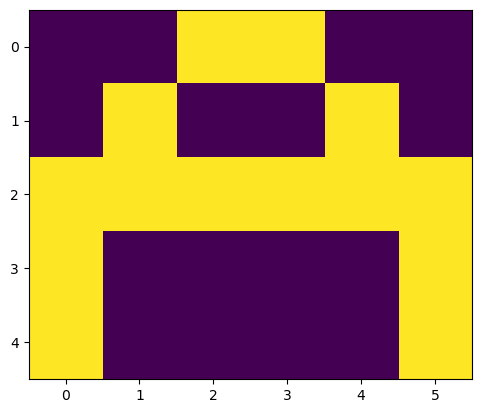

In [6]:
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [7]:
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector 
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""

x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
								np.array(c).reshape(1, 30)]


# Labels are also converted into NumPy array
y = np.array(y)


print(x, "\n\n", y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [8]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# out put of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# output of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 




In [9]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)


[[-0.16102479  0.82929153 -0.92852854 -0.61098294  2.23794114]
 [-0.21112026 -0.35132213  2.78017955 -1.16185152  1.36631258]
 [ 1.66468716  1.31326653 -1.14735071 -0.77502507  0.58836976]
 [ 0.09332077  0.91505764 -1.0922009  -0.72215738  0.67853192]
 [-0.07148813  0.59029844 -0.77532403 -0.42821518  1.65404623]
 [-0.62621562 -1.59350087 -1.67051201  1.25504784  0.3368386 ]
 [ 0.52578647  2.59319988 -1.08495034 -1.84837801  0.5046463 ]
 [ 0.40888316 -0.19864259  1.52061173 -0.83872484  0.0375142 ]
 [-0.38418185  0.35296154  1.10785512 -0.76824229  0.0664904 ]
 [-0.14914961  1.25573955  0.75851155  0.80640605  0.08079696]
 [ 1.62265695 -0.94105554  0.3502228  -1.07443392  0.17289404]
 [-1.00383551 -0.96608519  0.20664766  0.93528754  0.84748768]
 [-0.30284464  1.13175686  0.65839913  0.20243866 -0.93182134]
 [ 0.20647073 -0.48697361  1.30180674  0.52809086 -1.2874677 ]
 [ 0.93376606  0.72435072  0.93230263  0.64022827 -0.29729793]
 [-1.28293747 -1.30613244 -0.14286053 -0.26434909  1.20

In [10]:
"""The arguments of train function are data set list x, 
correct labels y, weights w1, w2, learning rate = 0.1, 
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of 
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 71.56358110852511
epochs: 2 ======== acc: 73.83054364134578
epochs: 3 ======== acc: 75.66690292359381
epochs: 4 ======== acc: 77.1234027974969
epochs: 5 ======== acc: 78.2885265268885
epochs: 6 ======== acc: 79.24398811470009
epochs: 7 ======== acc: 80.0504990091608
epochs: 8 ======== acc: 80.74892427160039
epochs: 9 ======== acc: 81.36585146099348
epochs: 10 ======== acc: 81.918856198751
epochs: 11 ======== acc: 82.4202185732938
epochs: 12 ======== acc: 82.8791848752502
epochs: 13 ======== acc: 83.30321368579226
epochs: 14 ======== acc: 83.69861961265421
epochs: 15 ======== acc: 84.07090334072537
epochs: 16 ======== acc: 84.42493665496411
epochs: 17 ======== acc: 84.7650853383757
epochs: 18 ======== acc: 85.095300434873
epochs: 19 ======== acc: 85.41917883665981
epochs: 20 ======== acc: 85.7399773764225
epochs: 21 ======== acc: 86.06055505697309
epochs: 22 ======== acc: 86.38321704695223
epochs: 23 ======== acc: 86.70945088472253
epochs: 24 ======== acc: 87.039

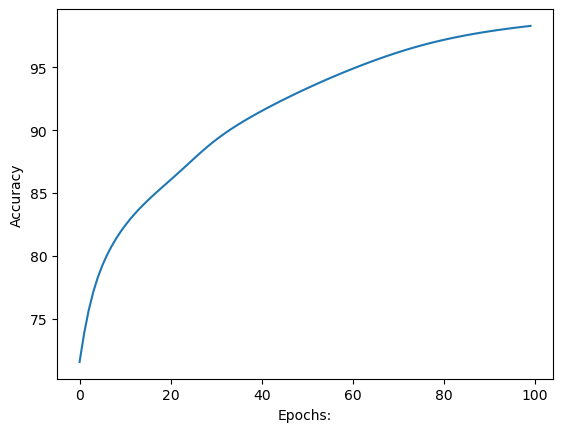

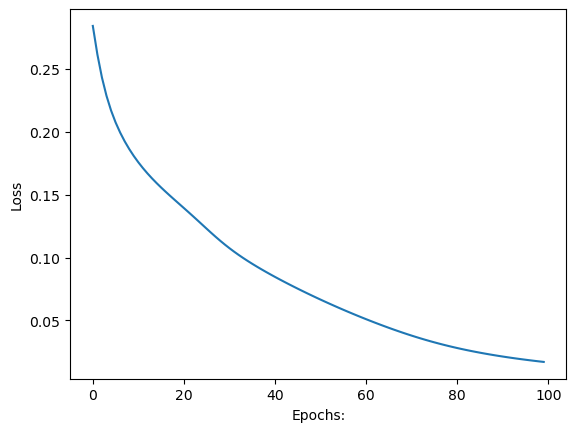

In [11]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()


In [12]:
# the trained weights are
print(w1, "\n", w2)


[[-1.61024792e-01  8.29291525e-01 -9.28528545e-01 -6.10982936e-01
   2.23794114e+00]
 [-3.37517613e-02 -4.37287990e-01  2.54197895e+00 -8.66256509e-01
   1.34640275e+00]
 [ 1.57087046e+00  1.28156624e+00 -1.16380973e+00 -4.88470008e-01
   6.49095375e-01]
 [-4.95925252e-04  8.83357348e-01 -1.10865991e+00 -4.35602314e-01
   7.39257535e-01]
 [ 1.05880364e-01  5.04332581e-01 -1.01352463e+00 -1.32620172e-01
   1.63413639e+00]
 [-6.26215621e-01 -1.59350087e+00 -1.67051201e+00  1.25504784e+00
   3.36838598e-01]
 [ 5.25786474e-01  2.59319988e+00 -1.08495034e+00 -1.84837801e+00
   5.04646296e-01]
 [ 3.15066456e-01 -2.30342883e-01  1.50415271e+00 -5.52169775e-01
   9.82398159e-02]
 [-3.84181854e-01  3.52961536e-01  1.10785512e+00 -7.68242292e-01
   6.64903979e-02]
 [-1.49149615e-01  1.25573955e+00  7.58511548e-01  8.06406051e-01
   8.07969576e-02]
 [ 1.46407984e+00 -3.44077209e-01 -4.32718872e-01 -1.70936021e+00
   2.54766724e-01]
 [-1.00383551e+00 -9.66085189e-01  2.06647658e-01  9.35287537e-01

Image is of letter B.


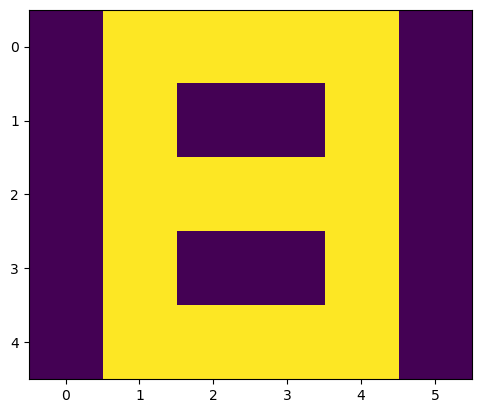

In [13]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)
